###### 17.12.2017
### Solving weighted graph assignment problem with simulated annealing
#### Michał Sitko, Krzysztof Jankowski

The optimization algorithm can be invoked using `simulated_annealing.execute` method with `graph` and `parameters` parameters.

The `graph` parameter is a [networkx](https://networkx.github.io/) Graph interface. Therefore graph assignments in [multiple formats](https://networkx.github.io/documentation/stable/reference/readwrite/index.html) supported by the library can be loaded and solved. Custom random bipartite graphs was also implemented. For the purpose of this assigment custom random generator will be used. We will investigate other interesting and useful data sources.

The `paramters` parameter is a structure of simulated_annealing algorithm paramters:
- t_max - maximum temperature,
- t_min - minimum temperature,
- k_t - number of neighbour solutions checked in each iteration,
- cooling_scheme - type of a cooling scheme - one of Exponential, Logarithmic, Linear,
- i_s2_observation_interval - interval of generating observations (expressed in number of neighbour solution checked),
- i_s3_observation_interval - interval of generating observations (expressed in number of temperature updates).

Let's import simulated_annealing library and find what it can be used for!

In [11]:
from graph import *
from simulated_annealing import *

Let's generate small graph with 3 vertices in the left part and 10 vertices in the right part. Edge weights should be in range of [0, 10].

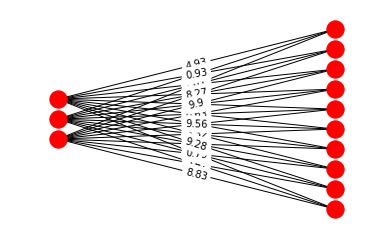

In [12]:
G = Graph.random_bipartite(3, 10, 0, 10)
Graph.draw_bipartite(G)

The following code solves the problem with the following parameters:
- t_max = 100
- t_min = 0
- k_t = 2

In [13]:
parameters = SimulatedAnnealingParameters(
    t_max=100,
    t_min=0,
    cooling_scheme=CoolingSchemeLinear(0.78),
    k_t=2,
    i_s2_observation_interval=1,
    i_s3_observation_interval=1
)

result = SimulatedAnnealing.execute(G, parameters)
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

Best total value 2.0100000000000002 found in 0.003075122833251953 time.


Let's draw the solution and solution improvement curve.

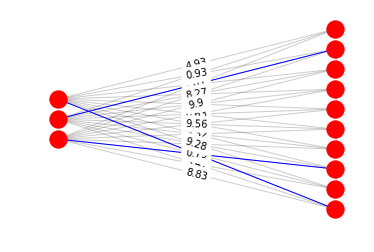

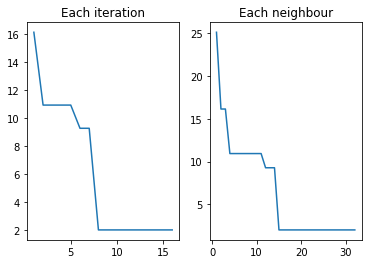

In [14]:
result.draw_solution()
result.draw_observations_plot()

Now let's genereate substantialy bigger graph 250x200 vertices and repeat the experiment using the same parameters.

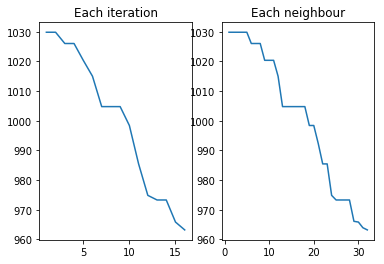

Best total value 963.1699999999995 found in 0.05941486358642578 time.


In [15]:
G = Graph.random_bipartite(250, 200, 0, 10)
result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

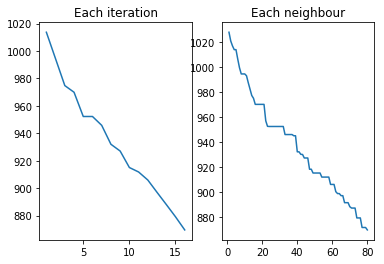

Best total value 869.6099999999996 found in 0.1335160732269287 time.


In [16]:
parameters.k_t = 5

result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

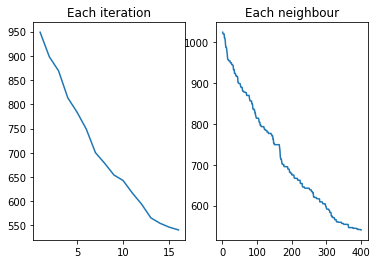

Best total value 540.7499999999999 found in 0.4893021583557129 time.


In [17]:
parameters.k_t = 25

result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

Not surprisingly we got much better results by increasing the the number of neighbours searched.